Clase 5
====

Objetivo:

* Introducción a cobrapy

La documentación oficial de cobra se encuentra disponible [aquí](http://cobrapy.readthedocs.io/en/0.4.0/getting_started.html). Hoy veremos los comandos escenciales de cobra y construiremos nuestra propia red metábolica.

Comandos básicos
--------------

Comezaremos cargado cobra y determinando que version está instalada (esto es útil para consultar la documentación adecuada; diferentes versiones de cobra tienen diferentes documentaciones)

In [1]:
import cobra
cobra.__version__

'0.4.0'

A modo de ejemplo importaremos la red metabólica de Escherichia coli

In [2]:
import cobra.test

# "ecoli" and "salmonella" are also valid arguments
model = cobra.test.create_test_model("ecoli")

Veamos cuantas reacciones y metabolitos tiene "ecoli"

In [3]:
print(len(model.reactions))
print(len(model.metabolites))

2583
1805


Podemos inspeccionar reacciones individualmente. Por ejemplo, para ver la reacción 30:

In [6]:
print model.reactions[101].reaction

damp_e --> 


Ver las primeras 10 reacciones:

In [9]:
for i in range(10):
    print model.reactions[i]

DM_4CRSOL
DM_5DRIB
DM_AACALD
DM_AMOB
DM_MTHTHF
DM_OXAM
Ec_biomass_iJO1366_WT_53p95M
Ec_biomass_iJO1366_core_53p95M
EX_12ppd__R_e
EX_12ppd__S_e


También podemos identificar una reacción por su nombre:

In [10]:
pgi = model.reactions.get_by_id("PGI")
print pgi
print pgi.reaction
print pgi.name


print(pgi.lower_bound, "< pgi <", pgi.upper_bound)

PGI
g6p_c <=> f6p_c
glucose-6-phosphate isomerase
(-1000.0, '< pgi <', 1000.0)


Podemos verificar el balance de masa de una reacción:

In [11]:
# Balance de masa original
print pgi.check_mass_balance()

# Veamos que pasa con el balance de masa si ahora agregamos un metabolito a la reacción
pgi.add_metabolites({model.metabolites.get_by_id("h_c"): -1})
pgi.reaction
print pgi.check_mass_balance()

{}
{'H': -1.0, 'charge': -1.0}


Tambien podemos ver cuales son las reacciones en las que un determinado metabólito está involucrado:

In [12]:
for rxn in model.metabolites.get_by_id("atp_c").reactions:
    print rxn, rxn.reaction

ADOCBLabcpp adocbl_p + atp_c + h2o_c --> adocbl_c + adp_c + h_c + pi_c
PE181abcpp atp_c + h2o_c + pe181_c --> adp_c + h_c + pe181_p + pi_c
HSK atp_c + hom__L_c --> adp_c + h_c + phom_c
AACPS1 ACP_c + atp_c + ttdca_c --> amp_c + myrsACP_c + ppi_c
CYSDabcpp atp_c + cys__D_p + h2o_c --> adp_c + cys__D_c + h_c + pi_c
SUCBZL atp_c + coa_c + sucbz_c --> amp_c + ppi_c + sbzcoa_c
CLIPAabctex atp_c + h2o_c + lipa_cold_p --> adp_c + h_c + lipa_cold_e + pi_c
ADSK aps_c + atp_c --> adp_c + h_c + paps_c
PPAKr adp_c + ppap_c <=> atp_c + ppa_c
ACGAMK acgam_c + atp_c --> acgam6p_c + adp_c + h_c
ETHSO3abcpp atp_c + ethso3_p + h2o_c --> adp_c + ethso3_c + h_c + pi_c
ILETRS atp_c + ile__L_c + trnaile_c --> amp_c + iletrna_c + ppi_c
PHETRS atp_c + phe__L_c + trnaphe_c --> amp_c + phetrna_c + ppi_c
LYSabcpp atp_c + h2o_c + lys__L_p --> adp_c + h_c + lys__L_c + pi_c
FCLK atp_c + fcl__L_c --> adp_c + fc1p_c + h_c
PG120abcpp atp_c + h2o_c + pg120_c --> adp_c + h_c + pg120_p + pi_c
PFK atp_c + f6p_c --> adp_c 

Simulación de flujos metabólicos
================================

Para simular los flujos metabólicos optimizacmos los flujos de la red metabólica:

In [13]:
print model.optimize()
#solution=model.optimize()

<Solution 0.99 at 0x7f711152c6d0>


Los resultados se pueder revisar:

In [39]:
print model.optimize()
#solution=model.optimize()
print model.solution.status # print solution.status
print model.solution.f      # print solution.f


<Solution 0.99 at 0x7f7111cb9c10>
optimal
0.988405906544
Exchange reaction of CO2 10.0
Exchange reaction of H2 520.0
First reaction 10.0
Second reaction 510.0
Third reaction 500.0
Exchange reaction of CH4 10.0
Exchange reaction of F420 1000.0
Exchange reaction of H20 500.0


Para inspeccionar como la función objetivo (en este caso:"Ec_biomass_iJO1366_core_53p95M")

In [15]:
biomass = model.reactions.get_by_id("Ec_biomass_iJO1366_core_53p95M")
print biomass.reaction


0.000223 10fthf_c + 2.6e-05 2fe2s_c + 0.000223 2ohph_c + 0.00026 4fe4s_c + 0.513689 ala__L_c + 0.000223 amet_c + 0.295792 arg__L_c + 0.241055 asn__L_c + 0.241055 asp__L_c + 54.124831 atp_c + 0.000122 bmocogdp_c + 2e-06 btn_c + 0.005205 ca2_c + 0.005205 cl_c + 0.000576 coa_c + 2.5e-05 cobalt2_c + 0.133508 ctp_c + 0.000709 cu2_c + 0.09158 cys__L_c + 0.026166 datp_c + 0.027017 dctp_c + 0.027017 dgtp_c + 0.026166 dttp_c + 0.000223 fad_c + 0.006715 fe2_c + 0.007808 fe3_c + 0.26316 gln__L_c + 0.26316 glu__L_c + 0.612638 gly_c + 0.215096 gtp_c + 48.601527 h2o_c + 0.094738 his__L_c + 0.290529 ile__L_c + 0.195193 k_c + 0.019456 kdo2lipid4_e + 0.450531 leu__L_c + 0.343161 lys__L_c + 0.153686 met__L_c + 0.008675 mg2_c + 0.000223 mlthf_c + 0.000691 mn2_c + 7e-06 mobd_c + 0.013894 murein5px4p_p + 0.001831 nad_c + 0.000447 nadp_c + 0.013013 nh4_c + 0.000323 ni2_c + 0.017868 pe160_c + 0.045946 pe160_p + 0.054154 pe161_c + 0.02106 pe161_p + 0.185265 phe__L_c + 0.000223 pheme_c + 0.221055 pro__L_c + 0.

Planos de fase
--------------

Los planos de fase son útiles cuando se quiere evaluar como cambios en las variables (tipicamente flujos de entrada) afectan el valor de la función objetivo (tipicamente producción de biomasa).

Veamos una representación gráfica usando otra red de ejemplo (llamada model2):

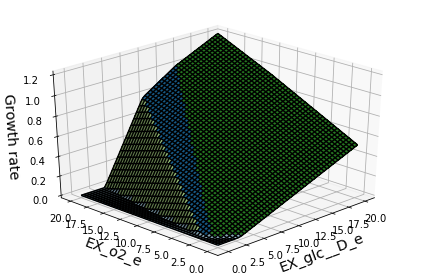

In [16]:
%matplotlib inline
from time import time

from cobra.flux_analysis import calculate_phenotype_phase_plane

model2 = cobra.test.create_test_model("textbook")
data = calculate_phenotype_phase_plane(model2, "EX_glc__D_e", "EX_o2_e")
data.plot_matplotlib();

Ejercicio
---------

* Realizar este gráfico para la red de ecoli variando el consumo de glucosa y oxigeno.

Nota: deberas identificar las reacciones asociados al consumo de glucosa y oxigeno (pista: usa el comando `model.summary()` ).

EX_glc_e glc__D_e <=> 
GLCtex glc__D_e <=> glc__D_p
GLCtexi glc__D_e --> glc__D_p


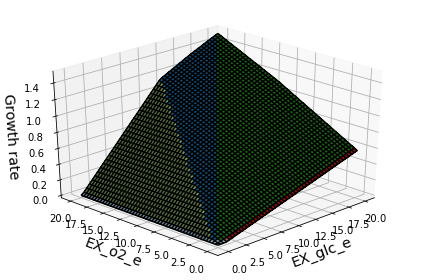

In [18]:
for rxn in model.metabolites.get_by_id("glc__D_e").reactions:
    print rxn, rxn.reaction
    
%matplotlib inline
from time import time

from cobra.flux_analysis import calculate_phenotype_phase_plane


data = calculate_phenotype_phase_plane(model, "EX_glc_e", "EX_o2_e")
data.plot_matplotlib();

Building a model
=========

Ahora construiremos nuestra propia red metaolica usando como ejemplo la red metanogénica que vimos en la clase pasada:

![Image](https://raw.githubusercontent.com/modcommet/Clases/master/metanogenesis.png)

In [27]:
from cobra import Model, Reaction, Metabolite
cobra_model = Model('primordialMetabolism')

# Ractions
E1 = Reaction('E1')
E1.name = 'Exchange reaction of CO2'
E1.subsystem = 'Entrance'
E1.lower_bound = 10.  # This is the default
E1.upper_bound = 1000.  # This is the default
E1.objective_coefficient = 0. # this is the default

E2 = Reaction('E2')
E2.name = 'Exchange reaction of H2'
E2.subsystem = 'Entrance'
E2.lower_bound = 0.  # This is the default
E2.upper_bound = 1000.  # This is the default
E2.objective_coefficient = 0. # this is the default

R1 = Reaction('R1')
R1.name = 'First reaction'
R1.subsystem = 'Internal reaction'
R1.lower_bound = 0.  # This is the default
R1.upper_bound = 1000.  # This is the default
R1.objective_coefficient = 0. # this is the default

R2 = Reaction('R2')
R2.name = 'Second reaction'
R2.subsystem = 'Internal reaction'
R2.lower_bound = 0.  # This is the default
R2.upper_bound = 1000.  # This is the default
R2.objective_coefficient = 0. # this is the default

R3 = Reaction('R3')
R3.name = 'Third reaction'
R3.subsystem = 'Internal reaction'
R3.lower_bound = 0.  # This is the default
R3.upper_bound = 1000.  # This is the default
R3.objective_coefficient = 0. # this is the default

E3 = Reaction('E3')
E3.name = 'Exchange reaction of CH4'
E3.subsystem = 'Exit'
E3.lower_bound = 10.  # This is the default
E3.upper_bound = 1000.  # This is the default
E3.objective_coefficient = 0. # this is the default

E4 = Reaction('E4')
E4.name = 'Exchange reaction of F420'
E4.subsystem = 'Exit'
E4.lower_bound = 0.  # This is the default
E4.upper_bound = 1000.  # This is the default
#E4.objective_coefficient = 1. # this is the default

E5 = Reaction('E5')
E5.name = 'Exchange reaction of H20'
E5.subsystem = 'Exit'
E5.lower_bound = 0.  # This is the default
E5.upper_bound = 1000.  # This is the default
#E5.objective_coefficient = 0. # this is the default

# Agrega el resto de las reacciones

# Metabolites
CO2 = Metabolite('CO2', formula='CO2',name='carbon dioxide',compartment='c')
H2 = Metabolite('H2', formula='H2',name='H2',compartment='c')
F420 = Metabolite('F420', formula='F420',name='F420',compartment='c')
I1 = Metabolite('I1', formula='I1',name='I1',compartment='c')
H2O = Metabolite('H2O', formula='H2O',name='H2O',compartment='c')
CH4 = Metabolite('CH4', formula='CH4',name='CH4',compartment='c')


# Agrega el resto de los metabolitos

# Adding metabolites to reaction
E1.add_metabolites({CO2: 1.0})
E2.add_metabolites({H2: 2.0})
R1.add_metabolites({H2: -2.0,CO2:-1,F420:-1,I1:1})
R2.add_metabolites({I1:-1,H2:-2,CH4:1,F420:1})
R3.add_metabolites({I1:1,CH4:-1,F420:1,H2O:2})
E3.add_metabolites({CH4: -1.0})
E4.add_metabolites({F420: -1})
E5.add_metabolites({H2O: -2})

# ya sabes que hacer :P

# Add reactin to model
cobra_model.add_reaction(E1)
cobra_model.add_reaction(E2)
cobra_model.add_reaction(R1)
cobra_model.add_reaction(R2)
cobra_model.add_reaction(R3)
cobra_model.add_reaction(E3)
cobra_model.add_reaction(E4)
cobra_model.add_reaction(E5)

# lo mismo aquí

cobra_model.objective = 'E4'

Puedes revisar tu modelo con los siguientes comandos

In [26]:
# Iterate through the the objects in the model
print("Reactions")
print("---------")
for x in cobra_model.reactions:
    print("%s : %s" % (x.id, x.reaction))
print("Metabolites")
print("-----------")
for x in cobra_model.metabolites:
    print('%s : %s' % (x.id, x.formula))

Reactions
---------
E1 :  --> CO2
E2 :  --> 2.0 H2
R1 : CO2 + F420 + 2.0 H2 --> I1
R2 : 2 H2 + I1 --> CH4 + F420
R3 : CH4 --> F420 + 2 H2O + I1
E3 : CH4 --> 
E4 : F420 --> 
E5 : 2 H2O --> 
Metabolites
-----------
CO2 : CO2
H2 : H2
F420 : F420
I1 : I1
CH4 : CH4
H2O : H2O


Ejercicio
---------

* Simula los flujos de esta red metabólica.
    

In [40]:
print cobra_model.optimize()
print cobra_model.solution.status
print cobra_model.solution.f 
for i in cobra_model.reactions:
    print i.name, i.x

<Solution 1000.00 at 0x7f710e0abc90>
optimal
1000.0
Exchange reaction of CO2 10.0
Exchange reaction of H2 520.0
First reaction 10.0
Second reaction 510.0
Third reaction 500.0
Exchange reaction of CH4 10.0
Exchange reaction of F420 1000.0
Exchange reaction of H20 500.0


In [31]:
print cobra_model.optimize()
#solution=model.optimize()
print cobra_model.solution.status # print solution.status
print cobra_model.solution.f      # print solution.f
print cobra_model.summary()       # print model.summary()

AttributeError: 'Model' object has no attribute 'f'

In [32]:
cobra.__version__

'0.4.0'